<a href="https://colab.research.google.com/github/OJB-Quantum/Notebooks-for-Ideas/blob/main/3D_Cow_Mesh_and_Dithering_Using_Trimesh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cow model loaded successfully!
 Sampled 5000 points from the mesh surface.


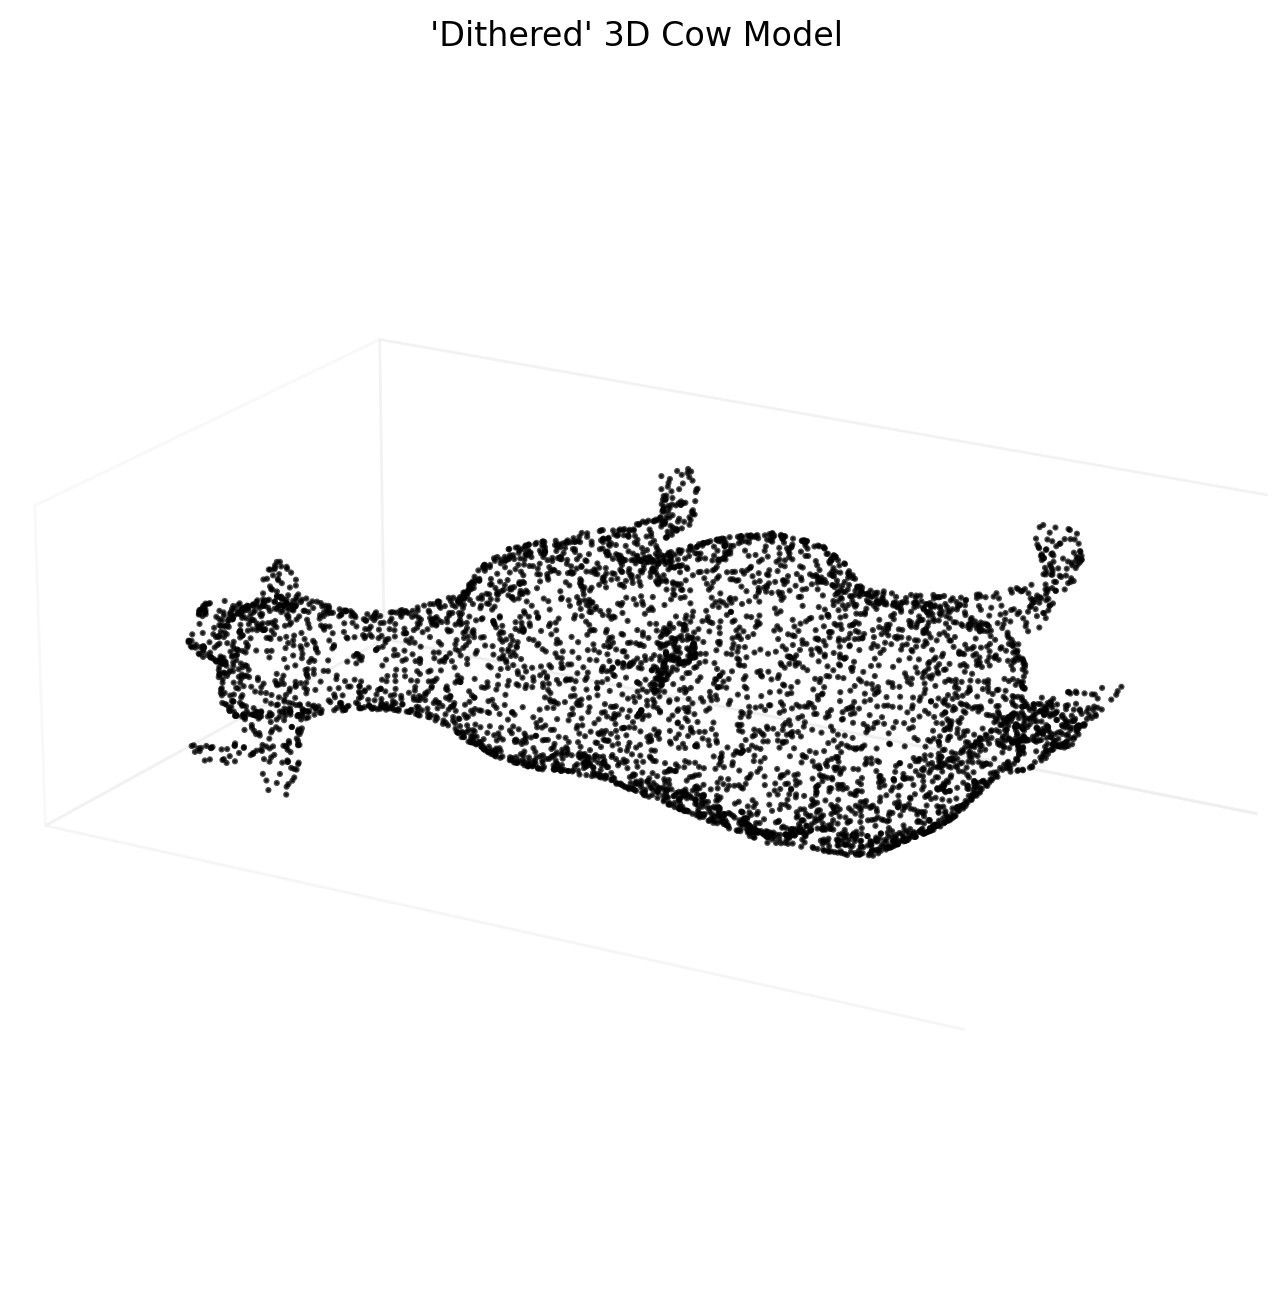

In [12]:
# @title Dither a 3D Cow Model
# @markdown Run this cell to install the required library, download a 3D cow model,
# @markdown sample points from its surface, and plot the resulting point cloud.

# Step 1: Install the 'trimesh' library for 3D model processing
!pip install trimesh -q

import trimesh
import numpy as np
import matplotlib.pyplot as plt
import urllib.request

plt.rcParams['figure.dpi'] = 200

# Step 2: Download a 3D cow model file (.obj)
# This model is from the "famous" collection of test models.
url = "https://raw.githubusercontent.com/alecjacobson/common-3d-test-models/master/data/cow.obj"
file_name = "cow.obj"
urllib.request.urlretrieve(url, file_name)

# Step 3: Load the cow mesh using trimesh
try:
    mesh = trimesh.load(file_name)
    print("Cow model loaded successfully!")
except Exception as e:
    print(f"❌ Failed to load model: {e}")

# Step 4: "Dither" the mesh by sampling points from its surface
# You can change 'num_points' to make the dithering denser or sparser.
num_points = 5000
points, _ = trimesh.sample.sample_surface(mesh, num_points)
print(f" Sampled {len(points)} points from the mesh surface.")

# Step 5: Plot the dithered point cloud using matplotlib
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the sampled points
ax.scatter(points[:, 0], points[:, 1], points[:, 2], s=1.5, c='black', alpha=0.7)

# --- Plot Customization ---
ax.set_title("'Dithered' 3D Cow Model")

# Set the viewing angle
ax.view_init(elev=20, azim=120)

# Set equal aspect ratio
ax.set_aspect('equal')

# Hide the grid and axis labels for a cleaner look
ax.grid(False)
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.xaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

plt.show()

Cow model loaded successfully!
Sampled 5000 points from the mesh surface.


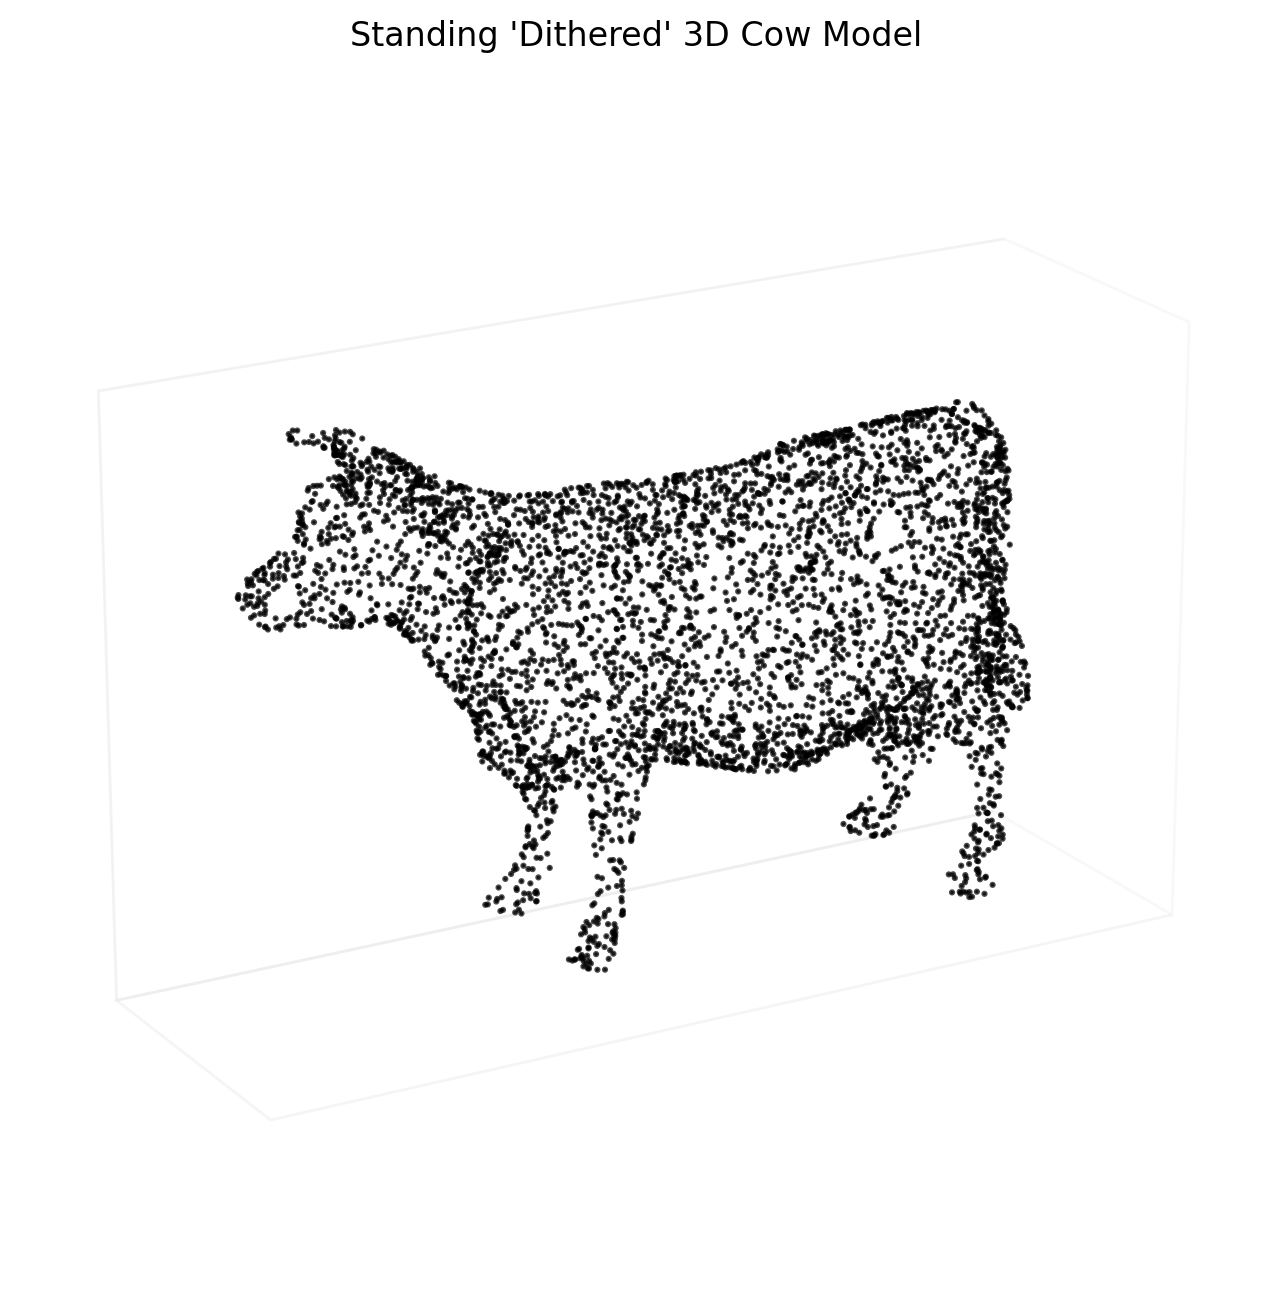

In [13]:
# @title Dither a Standing 3D Cow Model
# @markdown Run this cell to install the required library, download a 3D cow model,
# @markdown sample points from its surface, and plot the resulting point cloud.

import trimesh
import numpy as np
import matplotlib.pyplot as plt
import urllib.request

# Download the cow model file (.obj) if it's not already present
url = "https://raw.githubusercontent.com/alecjacobson/common-3d-test-models/master/data/cow.obj"
file_name = "cow.obj"
# Ensure the file is downloaded
try:
    urllib.request.urlretrieve(url, file_name)
    mesh = trimesh.load(file_name)
    print("Cow model loaded successfully!")
except Exception as e:
    print(f"❌ Failed to load model or download: {e}")
    # If loading fails, gracefully exit or use a placeholder
    exit() # For simplicity in this example, but in a real notebook, handle better.

# "Dither" the mesh by sampling points from its surface
num_points = 5000
points, _ = trimesh.sample.sample_surface(mesh, num_points)
print(f"Sampled {len(points)} points from the mesh surface.")

# --- Apply Rotation to make the cow stand up ---
# The cow is initially lying along the X-Z plane.
# To make it stand up, we need to rotate it around the X-axis by -90 degrees.
# Rotation matrix for rotating around the X-axis
theta = np.radians(90) # Rotate x degrees around X-axis
rotation_matrix_x = np.array([
    [1, 0, 0],
    [0, np.cos(theta), -np.sin(theta)],
    [0, np.sin(theta), np.cos(theta)]
])

# Apply the rotation to all points
rotated_points = points @ rotation_matrix_x.T # Apply rotation

# --- Plot the dithered point cloud ---
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(rotated_points[:, 0], rotated_points[:, 1], rotated_points[:, 2], s=1.5, c='black', alpha=0.7)

# --- Plot Customization ---
ax.set_title("Standing 'Dithered' 3D Cow Model")

# Set the viewing angle for a good upright perspective
ax.view_init(elev=20, azim=60) # Adjusted azimuth for better front view

# Set equal aspect ratio
ax.set_aspect('equal')

# Hide the grid and axis labels for a cleaner look
ax.grid(False)
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.xaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

plt.show()

Cow model loaded successfully!


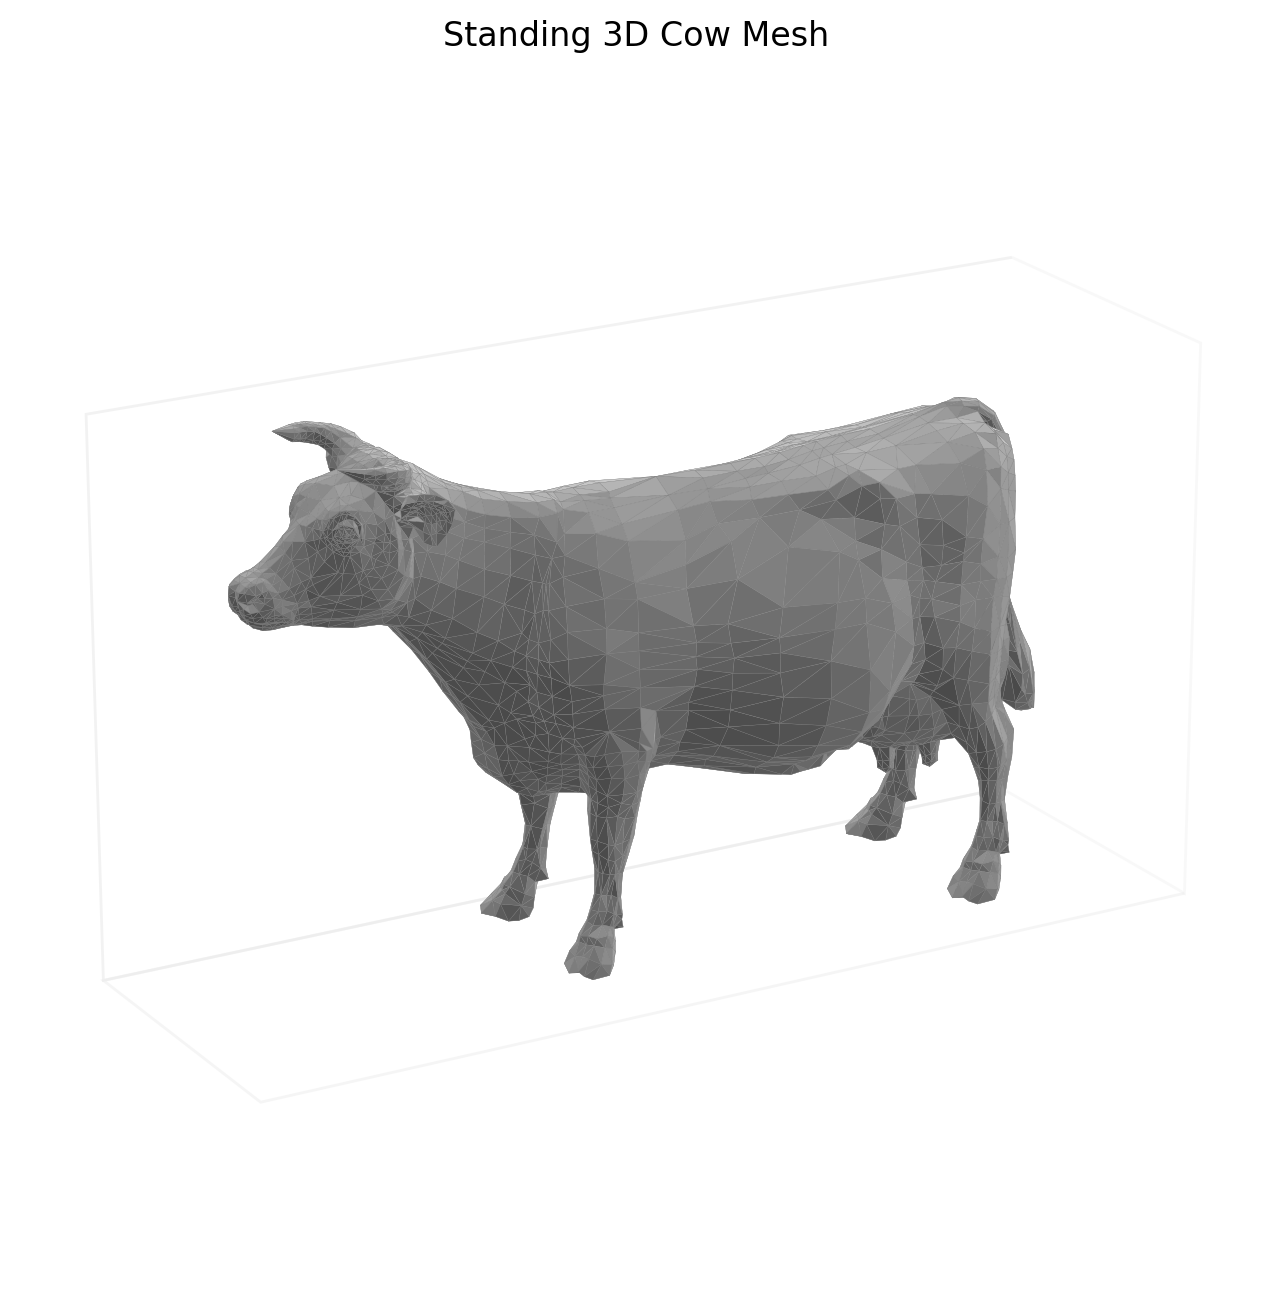

In [16]:
# @title Standing 3D Cow Mesh
# @markdown Run this cell to render the full 3D mesh of the standing cow.

import trimesh
import numpy as np
import matplotlib.pyplot as plt
import urllib.request

# Download the cow model file (.obj) if it's not already present
url = "https://raw.githubusercontent.com/alecjacobson/common-3d-test-models/master/data/cow.obj"
file_name = "cow.obj"
# Ensure the file is downloaded
try:
    urllib.request.urlretrieve(url, file_name)
    mesh = trimesh.load(file_name)
    print("Cow model loaded successfully!")
except Exception as e:
    print(f"❌ Failed to load model or download: {e}")
    exit()

# --- Apply Rotation to the Mesh Vertices ---
# We apply the same rotation as before, but this time to the mesh's vertices.
# A 90 degree rotation around the X-axis stands the cow up.
theta = np.radians(90)
rotation_matrix_x = np.array([
    [1, 0, 0],
    [0, np.cos(theta), -np.sin(theta)],
    [0, np.sin(theta), np.cos(theta)]
])

# Apply the rotation directly to the mesh's vertices
rotated_vertices = mesh.vertices @ rotation_matrix_x.T

# --- Plot the 3D Mesh ---
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Use plot_trisurf to render the mesh from its rotated vertices and faces
ax.plot_trisurf(
    rotated_vertices[:, 0], rotated_vertices[:, 1], rotated_vertices[:, 2],
    triangles=mesh.faces,
    color='whitesmoke',       # Face color of the mesh
    edgecolor='gray',     # Color of the triangle edges
    linewidth=0.1         # Width of the triangle edges
)

# --- Plot Customization ---
ax.set_title("Standing 3D Cow Mesh")

# Set the same viewing angle for a consistent perspective
ax.view_init(elev=20, azim=60)

# Set equal aspect ratio
ax.set_aspect('equal')

# Hide the grid and axis labels for a cleaner look
ax.grid(False)
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.xaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

plt.show()